# Basic concepts of plotting
---
* How to use matplotlib
* usage of axes and saving
* multiple plots in one
* Histograms, bars and pies
* 2D plots

## How to plot

One of the most popular libraries for plotting in python is matplotlib

In [12]:
import matplotlib.pyplot as plt

# needed only in jupyter and this session ---
# please ignore
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

lets generate some variables to be plotted


In [13]:
import numpy as np

# plotting limits and stepping (try np.pi)
start = -np.pi
end = np.pi
steps = 100

# create linear space in x and sin in y
x = np.linspace(start,end,steps)
y = np.sin(x)


we imported the plotting library as `plt` so for a straight forward plotting we will call its plot method:


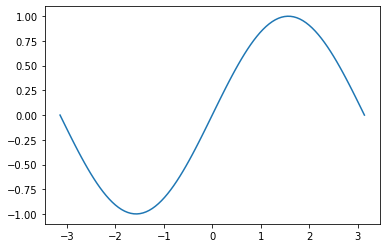

In [17]:
# plot y vs x
plt.plot(x,y)

# show the plot
plt.show()

__note__: 
- generally the horizontal axis is the first argument, while the second is the vertical axis
- the `show()` method is not always needed, but is reccomended to include it always

## Using axes and the figure instance

- it is advisable to generate the plot object in advance and to address the so-called *axes*
- the axes (stored below in the variable `ax`) also have a plot method that can be called

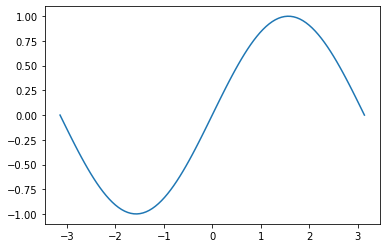

In [18]:
# generate plotting instance with axes
fig, ax = plt.subplots()

ax.plot(x,y)

fig.show()

now the figure has to variables `fig` and `ax` with which we can adress the figure and the axes, respectively.

### more axes methods

with `ax` we can now modify many values of the figure as, e.g. the labels, the ticks, the limits and so on...

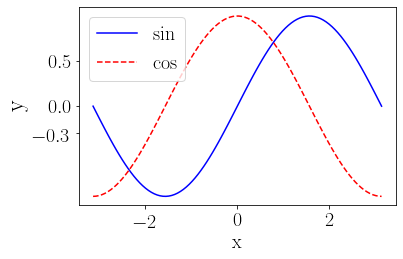

In [35]:
y1 = np.cos(x)

fig, ax = plt.subplots(1,1, tight_layout=True)

ax.plot(x,y, color="blue", label="sin")
ax.plot(x, y1, "r--", label="cos")

ax.set_xlabel("x")
ax.set_ylabel("y", size=24)

# set the limits of the x axis
# ax.set_xlim((-2, 2))

# set custom ticks on the y axis
ax.set_yticks([-0.3, 0, 0.5])

ax.legend()

fig.show()

### fontsize and Latex embedding globally
since it can be annoying to write down the specification of the fontsize for every label or tick that is created it is a good practice to set these generally at the __beginning__ of a session

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'DejaVu Sans','size': 20})

once we did run these commands the fontsizes, the font family and Latex are enabled for the entire session (so all plots generated from now on will have these attributes applied)

### saving the figure

- with the figure method `savefig()` a figure can be saved
- lets plot an exponential to see how Latex syntax can be incorporated into strings

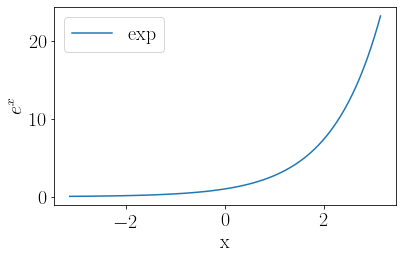

In [41]:
x = np.linspace(start, end, steps)
y = np.exp(x)

fig, ax = plt.subplots(1,1, tight_layout=True)

ax.plot(x,y, label="exp")

ax.set_xlabel("x")
ax.set_ylabel("$e^{x}$")

ax.legend()

fig.savefig("exponential.pdf")

## Multiple axes in one figure
- why do we use the cumbersome axes?
- with the `plt.subplots()` method we can create a grid of axes over which we can iterate

first we load the `population.txt` csv using pandas

In [15]:
import pandas as pd

pop = pd.read_csv("data/populations.txt", sep="\t")

In [43]:
print(pop)

    # year     hare     lynx  carrot
0     1900  30000.0   4000.0   48300
1     1901  47200.0   6100.0   48200
2     1902  70200.0   9800.0   41500
3     1903  77400.0  35200.0   38200
4     1904  36300.0  59400.0   40600
5     1905  20600.0  41700.0   39800
6     1906  18100.0  19000.0   38600
7     1907  21400.0  13000.0   42300
8     1908  22000.0   8300.0   44500
9     1909  25400.0   9100.0   42100
10    1910  27100.0   7400.0   46000
11    1911  40300.0   8000.0   46800
12    1912  57000.0  12300.0   43800
13    1913  76600.0  19500.0   40900
14    1914  52300.0  45700.0   39400
15    1915  19500.0  51100.0   39000
16    1916  11200.0  29700.0   36700
17    1917   7600.0  15800.0   41800
18    1918  14600.0   9700.0   43300
19    1919  16200.0  10100.0   41300
20    1920  24700.0   8600.0   47300


When looking at tables of data, first always take a minute to think about what you want to visualise. 

In this case we could, for example, plot the three populations as functions over time. Since the x-axis will always be the same here, the `subplots()` method can be handy here.

We thus generate a grid of axes that we call `axarr` and address them by their index

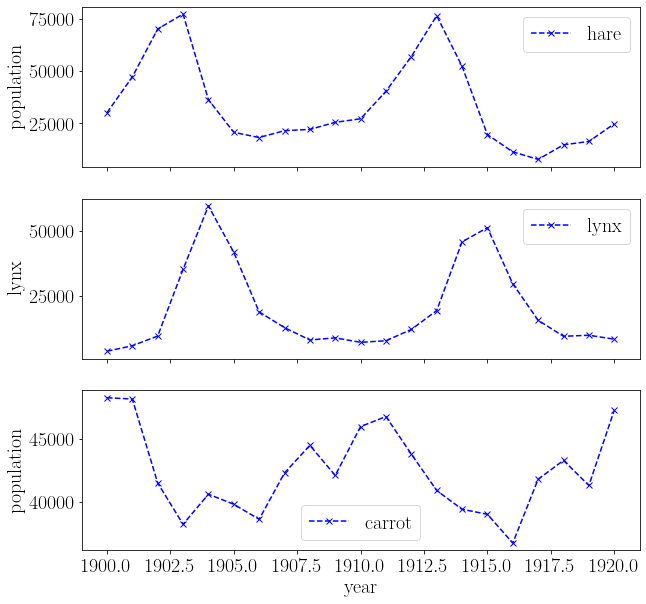

In [50]:
fig2, axarr = plt.subplots(3, 1, figsize=(10,10), sharex='col', sharey=False,
                           tight_layout=False)

for ind, el in enumerate(pop.keys()[1:]):
    axarr[ind].plot(pop['# year'], pop[el], 'b--', marker="x", label=el) 
    axarr[ind].legend()
    axarr[ind].set_ylabel("population")
    
axarr[2].set_xlabel("year")
axarr[1].set_ylabel("lynx")

fig2.savefig("populations.pdf")

__note__: 
- creating the (3x1) subplots (3 rows, 1 column) we had to adjust the figuresize with `figsize=(10,10)`. We also told the figure that we want to have the x values shared among all plots, while we don't want this to be true for the y values (`sharex` and `sharey` values).

- we looped over the second untill fourth entries of the pandas dataframe taking their keys (`el`) and the index (`ind`) of the list that is created in the for loop. With these two we can create three plots one over each other as shown.

- the single plotting axes can be addressed singularly as it is done for the xlabel of the third plot

- this examples shows the power of axes: with only a few lines of code we can already generate a pretty sophisticated plot

## Histograms

Until now we just plotted an array of x values vs an array of y values.

Ususally in research (and in statistics) we are often dealing with distributions. Thus lets look at histograms.

There are two main ways to plot histograms:
* the `.hist()` method and 
* the `.bar()` method



### `hist()`

This method takes a list of values (in this case a count of carrots) and automatically generates a histogram with a predefined number of bins.

Lets take the carrot population of the previous example


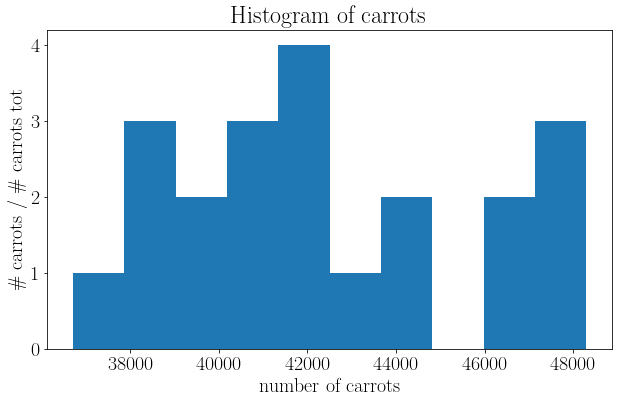

In [20]:
carrots = pop["carrot"]

fig, ax = plt.subplots(1,1, figsize=(9,6), tight_layout=True)

# normalized count of carrots (density=True)
# bins can be set to 'auto' for automatized bin nr detection
vals, binedges, dummyvar = ax.hist(carrots, bins=10, density=False)

ax.set_xlabel("number of carrots")
ax.set_ylabel("\# carrots / \# carrots tot")

# set a title of the plot
ax.set_title("Histogram of carrots")

fig.show()

### `bar()`

This method simply plots a bar, given a value (or a list of values) and a height (or a list of heights). It is thus predestined to represent histograms that where already computed. Meaning that there are some fixed values we already have and want to represent them as a "histogram"

Lets consider for example the maximum of the three populations of the example above

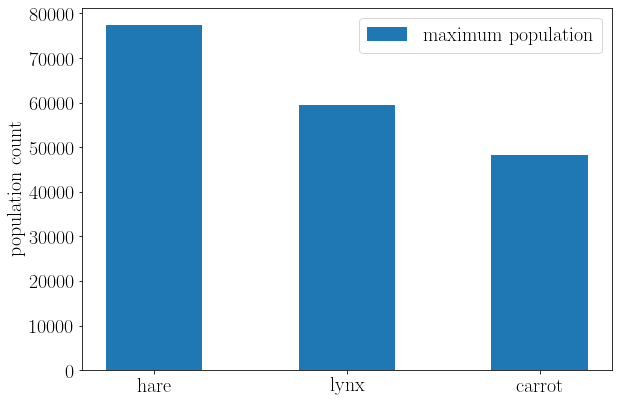

In [23]:
# use the 'pythonic' list comprehensions for getting lists of the max populations and the names
pop_name = [el for el in pop.keys()[1:]]
max_pop = [max(pop[el]) for el in pop_name]

x = np.arange(len(pop_name))

fig, ax = plt.subplots(1,1, figsize=(9,6), tight_layout=True)

width = 0.5  # the width of the bars

box = ax.bar(x, max_pop, width, label="maximum population")

# Add some text for labels and custom x-axis tick labels, etc.
ax.set_ylabel("population count")
ax.set_xticks(x)
ax.set_xticklabels(pop_name)
ax.legend()

plt.show()

Both methods have their *pros* and *cons*. With `hist()` it is straight forward to plot a histogram and one has not to bother with the single values of a series. With `bar()` on the other hand one can plot single values (also into the same plot, without much of an effort) and it is thus very useful when comparing e.g. two outcomes of one experiment. Take for instance the change in the fitting slope of a control dataset and one where some drugs where delivered.

### Pie charts

To briefly show how pie charts can be done with the `pie()` method, we can shortly "analyse" the `population.txt` data.

Lets take the sum of all populations during one year and then compute the ratio of each of them. At this point they should sum op to one and we can plot a pie chart with the list of fractions of the population multiplied by 100 (since `pie()` takes numbers between 0 and 100).

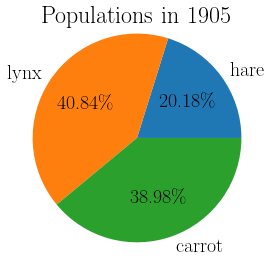

In [25]:
# divide the pop of hare into five year chunks then compute the avg there

pop_name = [el for el in pop.keys()[1:]]

# take one year and look at the fractions of the populations
year = 1905
pop_one_year = pop[pop["# year"] == year]
tot_pop = float(pop_one_year.iloc[:,1:].sum(axis=1))

pop_fractions = pop_one_year.iloc[:,1:].divide(tot_pop)

fig, ax = plt.subplots()

ax.pie(pop_fractions*100, labels=pop_name, autopct="%1.2f\%%", radius=1.2)
ax.set_title("Populations in {}".format(year))


plt.show()

## 2D Plots

Until now we have visualised only 1D plots y vs x. Often in science two dimensional contourplots can be very instructive.

* Here we use two methods for the generation of two dimensional plots: `pcolormesh()` and `contourf()`. These two differ in the way they interpolate the image colors showing a smooth surface in the former case and defining contours in the second one. (There is actually a third 2D plotting method... can you find it?)

__note__: These are two of several other methods for plotting 2D figures, with each different characteristics and properties.

* In this example we take two linear arrays x and y and create the two dimensional plane they span using numpy's meshgrid function. The output of this function are two 2D grids, in which "all the combinations" to for the 2D basis plane spanned by x and y are listed. With this meshgrid (uppercase X and Y) we can now compute an elevation value, given here by some custom defined function.

* Finally we plot the two matplotlib methods in the same figure using two axes (ax1 and ax2) and we do some cosmetics on the figure.
__note__: In order to be able to depict a color bar, we need to save the contourplot instance to a variable (twoD1 and twoD2 here). These we can then address with the method `fig.colorbar()` and assign them to the given axes.

__note 2__: We imported cm from matplotlib in order to change the colormap used (see [this page](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) for more). This has to be done at the very first place when we create the 2D plot with the function argument cmap.

In [26]:
steps = 100
x = np.linspace(-np.pi, np.pi, steps)
y = np.arange(-2*np.pi, 2*np.pi, 0.1)

# create meshgrid
X, Y = np.meshgrid(x, y)

Z = np.cos(X) + np.sin(Y)**2 + X*Y/4
Z

array([[ 3.9348022 ,  3.83712255,  3.74346144, ..., -5.72737107,
        -5.8330959 , -5.9348022 ],
       [ 3.8662291 ,  3.77013611,  3.67806166, ..., -5.64203786,
        -5.74617604, -5.84629567],
       [ 3.81719207,  3.72268575,  3.63219796, ..., -5.53716858,
        -5.63972009, -5.73825306],
       ...,
       [-5.65630423, -5.55882434, -5.45732591, ...,  3.61199823,
         3.70143294,  3.79488619],
       [-5.77671028, -5.67764373, -5.57455863, ...,  3.64549849,
         3.73651986,  3.83155977],
       [-5.87827625, -5.77762303, -5.67295127, ...,  3.69783883,
         3.79044686,  3.88707344]])

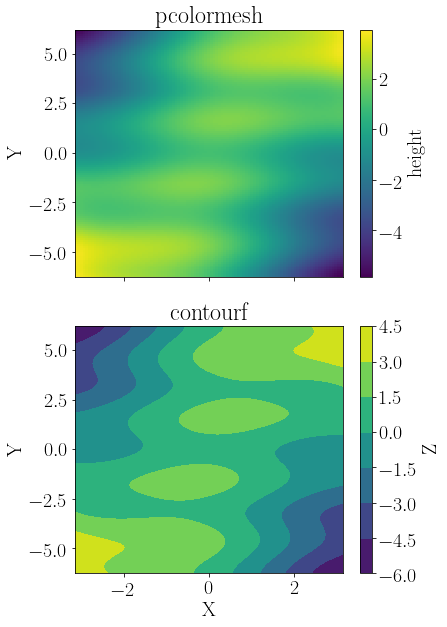

In [29]:
# import the color module for the colormap
from matplotlib import cm

# define x and y space
steps = 100
x = np.linspace(-np.pi, np.pi, steps)
y = np.arange(-2*np.pi, 2*np.pi, 0.1)

# create meshgrid
X, Y = np.meshgrid(x, y)

Z = np.cos(X) + np.sin(Y)**2 + X*Y/4

fig, (ax1, ax2) = plt.subplots(2, figsize=(6,10), sharex=True)

colormap = cm.viridis 
# cm.seismic

twoD1 = ax1.pcolormesh(X, Y, Z, cmap=colormap)
twoD2 = ax2.contourf(X, Y, Z, cmap=colormap)

# add contourlines to the second plot | add colors for visibility, e.g. colors=["r", "w"]
# contlines = ax2.contour(X, Y, Z, levels = [-3, -1, 0, 1, 3], linewidth=5.0)

# create the colorbar
cbar1 = fig.colorbar(twoD1, ax=ax1, label = "height")
cbar2 = fig.colorbar(twoD2, ax=ax2, label = "Z")

# some text cosmetics
ax1.set_title("pcolormesh")
ax2.set_title("contourf")
ax2.set_xlabel("X")
ax1.set_ylabel("Y")
ax2.set_ylabel("Y")


fig.show()

## Assignements
***
Whenever possible try to work on your own data and results. They should always have priority upon the course assignements, since you will learn so much more plotting and analysing your own things, rather than abstract excercises.

---

* Create a function for rapid plotting to be called in any moment for checking any x-y values. Optional/Advanced: write this function into a class that you can call from where your scripts are

* Compute the total population number of `population.txt` and compare to the other populations. Comment on what you see. Create a plot where the maximum and the minimum population of each type can be compared next to each other (`bar()` method can be usefull)

* Load the file with the brain sizes `brain_size.csv` and plot an array of figures (2x3) for females and males and the three IQ values. In another plot visualise histograms of the weight and height

* Create a 2D plot of a Gaußian two dimensional distribution without using `pcolormesh()` or `contourf()`, but search for a different method. Include a *horizontal* colorbar and plot also well visible contourlines with labels (you have to look for the function that allows you to access the contourline variable).